# Project 9 : Predicting Employee Attrition

Context :
- Employee attrition can impact organizational productivity and morale.
- Predicting attrition can help in retaining valuable employees.
- Machine learning can analyze employee data to identify attrition risks.


Goal:
- Build a model to predict whether an employee will leave the company.
- Analyze the factors contributing most to attrition.
- Provide recommendations for improving employee retention.


In [57]:
# Importation du jeux de données

# Nous avons un jeu de données qui est divisé en deux parties :
# - Un jeu de données d'entraînement (train.csv)
# - Un jeu de données de test (test.csv)

import pandas as pd

# Charger les deux fichiers
df_train = pd.read_csv("train.csv")
df_test  = pd.read_csv("test.csv")

# Fusionner les deux fichiers
df = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

## 1. Exploration des données

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from scipy.stats import chi2_contingency

In [59]:
# Forcer pandas à afficher toutes les lignes
pd.set_option("display.max_rows", None)

In [60]:
# Exploration du jeu de données


# 1. Dimensions du dataset
print("Nombre de lignes et de colonnes :", df.shape)


Nombre de lignes et de colonnes : (74498, 24)


In [61]:
# 2. Aperçu des 5 premières lignes
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [62]:
# 3. Types de variables et informations générales
print("\nInfos générales sur les colonnes :")
print(df.info())


Infos générales sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null

In [63]:
# 4. Statistiques descriptives
print("\nStatistiques descriptives (variables numériques) :")
print(df.describe())


Statistiques descriptives (variables numériques) :
        Employee ID           Age  Years at Company  Monthly Income  \
count  74498.000000  74498.000000      74498.000000    74498.000000   
mean   37249.500000     38.529746         15.721603     7299.379514   
std    21505.864514     12.083456         11.223744     2152.508566   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18625.250000     28.000000          7.000000     5652.000000   
50%    37249.500000     39.000000         13.000000     7348.000000   
75%    55873.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    16149.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74498.000000        74498.000000          74498.000000   
mean               0.832935           49.991584              1.650326   
std                0.995289           28.513611              1.553633   
min             

In [64]:
# 5. Vérification des doublons
nb_doublons = df.duplicated().sum()
print(f"\nNombre de doublons dans le dataset : {nb_doublons}")


Nombre de doublons dans le dataset : 0


In [65]:
# 6. Aperçu rapide des valeurs uniques par colonne
print("\nNombre de valeurs uniques par colonne :")
print(df.nunique())


Nombre de valeurs uniques par colonne :
Employee ID                 74498
Age                            42
Gender                          2
Years at Company               51
Job Role                        5
Monthly Income               9842
Work-Life Balance               4
Job Satisfaction                4
Performance Rating              4
Number of Promotions            5
Overtime                        2
Distance from Home             99
Education Level                 5
Marital Status                  3
Number of Dependents            7
Job Level                       3
Company Size                    3
Company Tenure                127
Remote Work                     2
Leadership Opportunities        2
Innovation Opportunities        2
Company Reputation              4
Employee Recognition            4
Attrition                       2
dtype: int64


In [66]:
# 7. Vérification des distributions de valeurs catégorielles
print("\nRépartition des variables catégorielles :")
for col in df.select_dtypes(include="object").columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(normalize=True).round(2) * 100)  # en %


Répartition des variables catégorielles :

--- Gender ---
Gender
Male      55.0
Female    45.0
Name: proportion, dtype: float64

--- Job Role ---
Job Role
Technology    26.0
Healthcare    23.0
Education     21.0
Media         16.0
Finance       14.0
Name: proportion, dtype: float64

--- Work-Life Balance ---
Work-Life Balance
Good         38.0
Fair         30.0
Excellent    18.0
Poor         14.0
Name: proportion, dtype: float64

--- Job Satisfaction ---
Job Satisfaction
High         50.0
Very High    20.0
Medium       20.0
Low          10.0
Name: proportion, dtype: float64

--- Performance Rating ---
Performance Rating
Average          60.0
High             20.0
Below Average    15.0
Low               5.0
Name: proportion, dtype: float64

--- Overtime ---
Overtime
No     67.0
Yes    33.0
Name: proportion, dtype: float64

--- Education Level ---
Education Level
Bachelor’s Degree    30.0
Associate Degree     25.0
Master’s Degree      20.0
High School          20.0
PhD                  


Résumé du nombre d'outliers par variable :
                      Nb outliers  % outliers
Years at Company            338.0        0.45
Monthly Income               65.0        0.09
Age                           0.0        0.00
Employee ID                   0.0        0.00
Number of Promotions          0.0        0.00
Distance from Home            0.0        0.00
Number of Dependents          0.0        0.00
Company Tenure                0.0        0.00


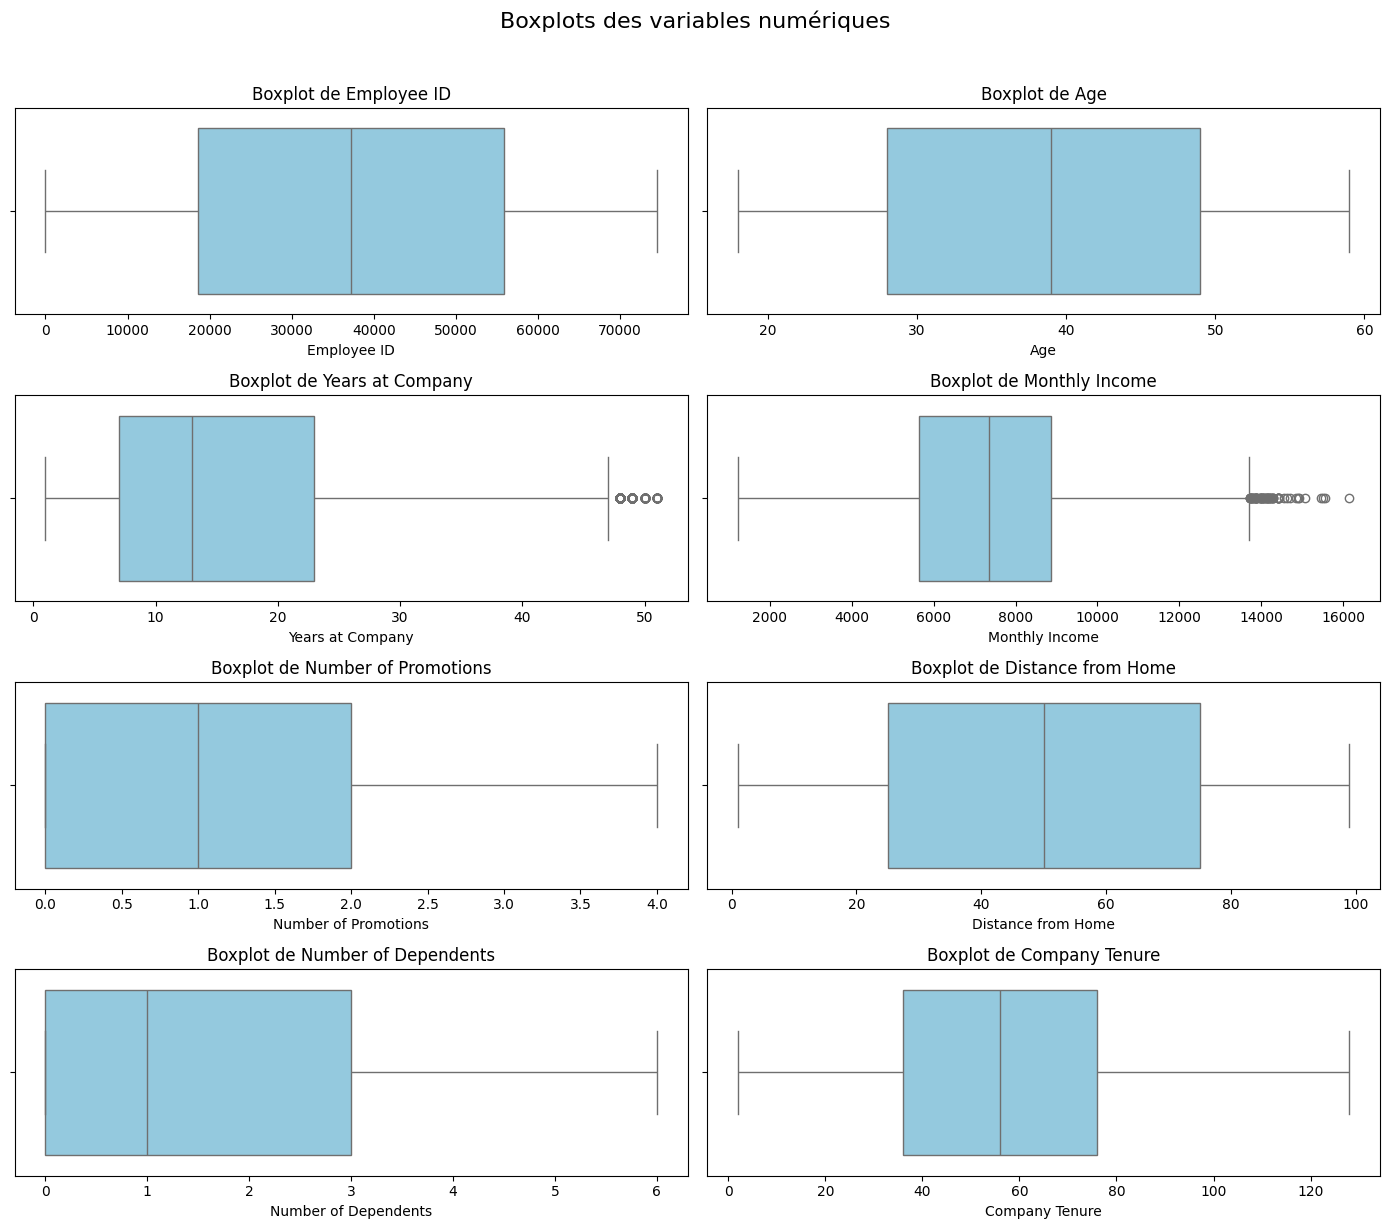

In [67]:
# Boxplots des variables numériques


num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Détection des outliers par IQR
outliers_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_summary[col] = {
        "Nb outliers": len(outliers),
        "% outliers": 100 * len(outliers) / len(df)
    }


outliers_df = pd.DataFrame(outliers_summary).T.sort_values("% outliers", ascending=False)
print("\nRésumé du nombre d'outliers par variable :")
print(outliers_df.round(2))

# Boxplots
n = len(num_cols)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 3*nrows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot de {col}")

# Supprimer les cases vides
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplots des variables numériques", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Nous observons alors 2 variables qui seraint susceptibles de contenir des valeurs aberrantes : 'Years at Company' et 'Monthly Income'. Nous allons les analyser plus en détail.

In [68]:
col = "Years at Company" 

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les outliers
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

print(f"Bornes pour {col} : {lower_bound:.2f} à {upper_bound:.2f}")
print(f"Nb d'outliers : {len(outliers)}")
display(outliers[[col]].head(10))  


Bornes pour Years at Company : -17.00 à 47.00
Nb d'outliers : 338


,Years at Company
465,48
662,49
843,49
1373,48
1567,48
1569,49
1590,50
1913,48
1998,50
2190,48


In [69]:
col = "Monthly Income"  

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les outliers
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

print(f"Bornes pour {col} : {lower_bound:.2f} à {upper_bound:.2f}")
print(f"Nb d'outliers : {len(outliers)}")
display(outliers[[col]].head(10)) 

Bornes pour Monthly Income : 816.00 à 13712.00
Nb d'outliers : 65


,Monthly Income
387,15495
1776,13961
3521,14014
3609,14016
8346,14176
8575,13962
8809,14276
10962,14066
13184,13876
14374,14421


Dans les deux cas, les valeurs détéctées comme aberrantes semblent plausibles au vu du contexte. Nous n'en tenons alors pas compte.

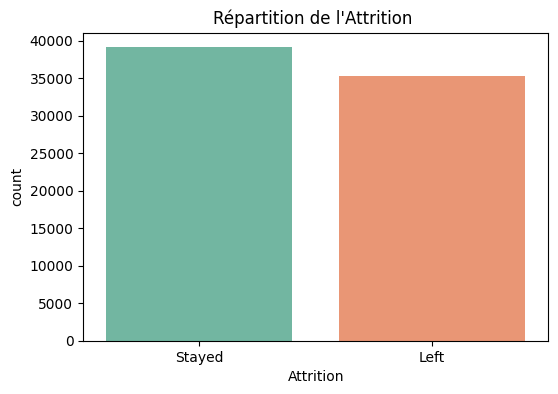

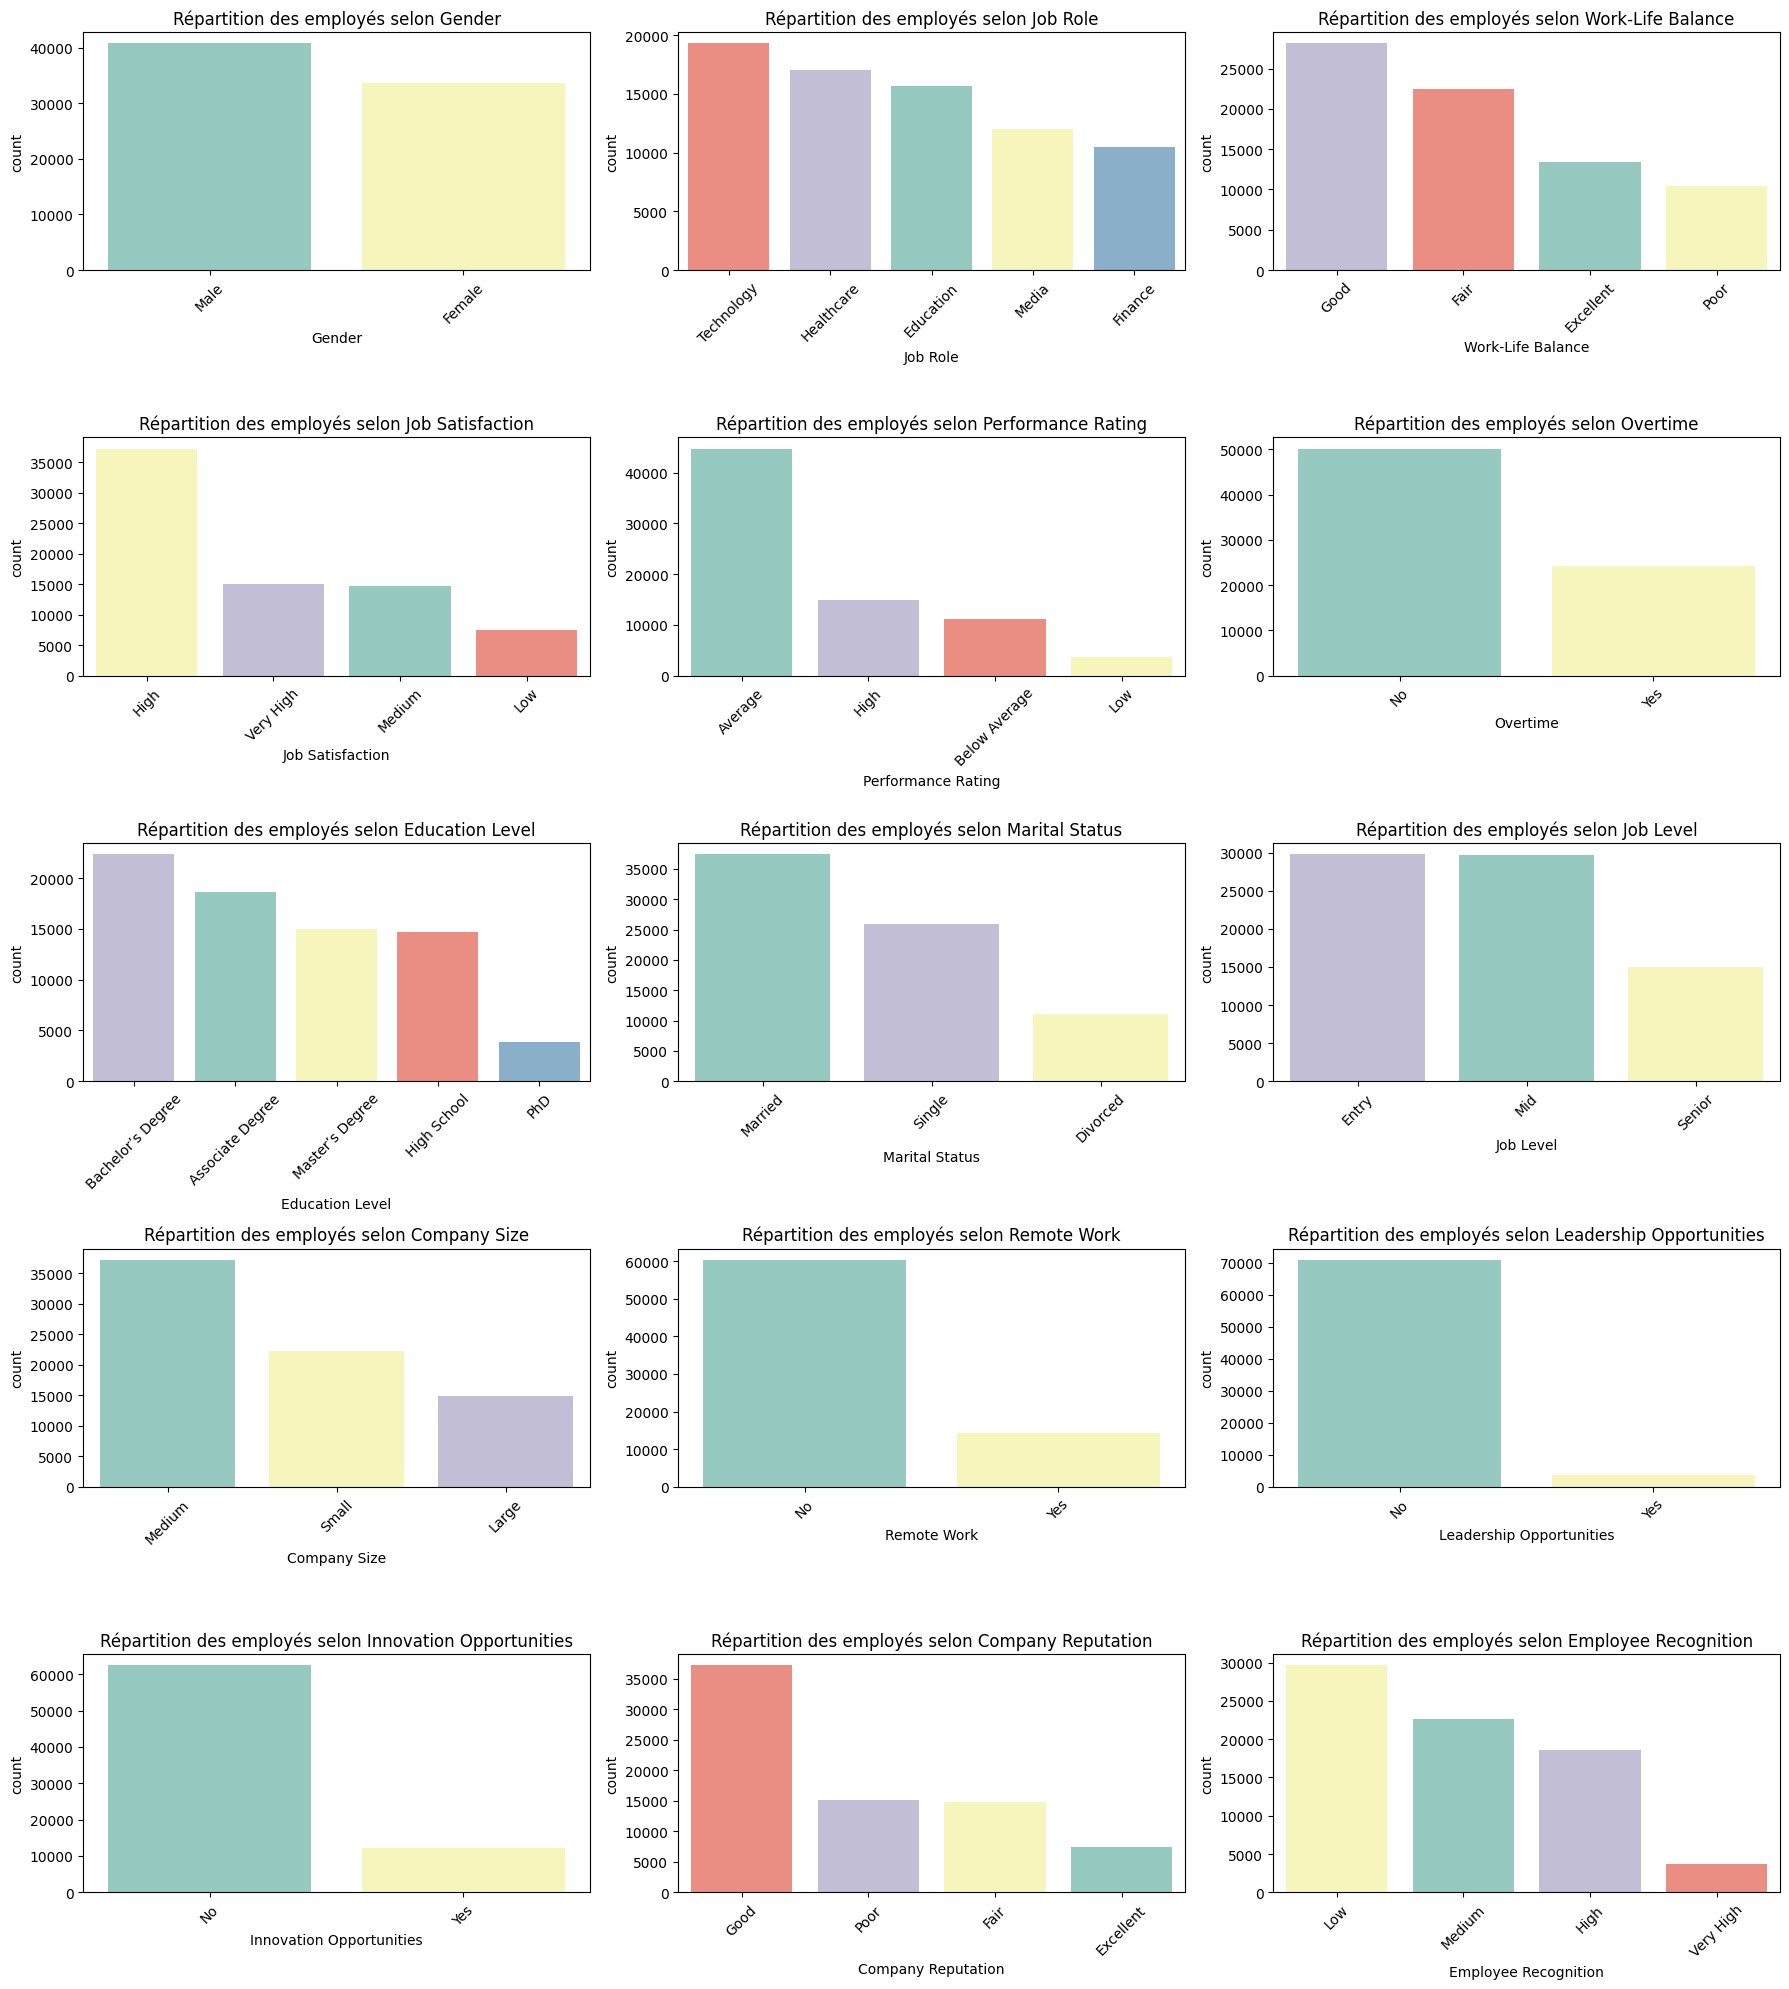

In [70]:
#  Variable cible (Attrition)
plt.figure(figsize=(6,4))
sns.countplot(x="Attrition", data=df, hue="Attrition", palette="Set2", legend=False)
plt.title("Répartition de l'Attrition ")
plt.show()

# Variables catégorielles regroupées en subplots
colonnes_cat = df.select_dtypes(include="object").columns.drop("Attrition")

n = len(colonnes_cat)   
cols = 3                
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
axes = axes.flatten()  

for i, col in enumerate(colonnes_cat):
    ax = axes[i]
    sns.countplot(
        x=col, data=df, hue=col, palette="Set3",
        legend=False, order=df[col].value_counts().index, ax=ax
    )
    ax.set_title(f"Répartition des employés selon {col}")
    ax.tick_params(axis="x", rotation=45)


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


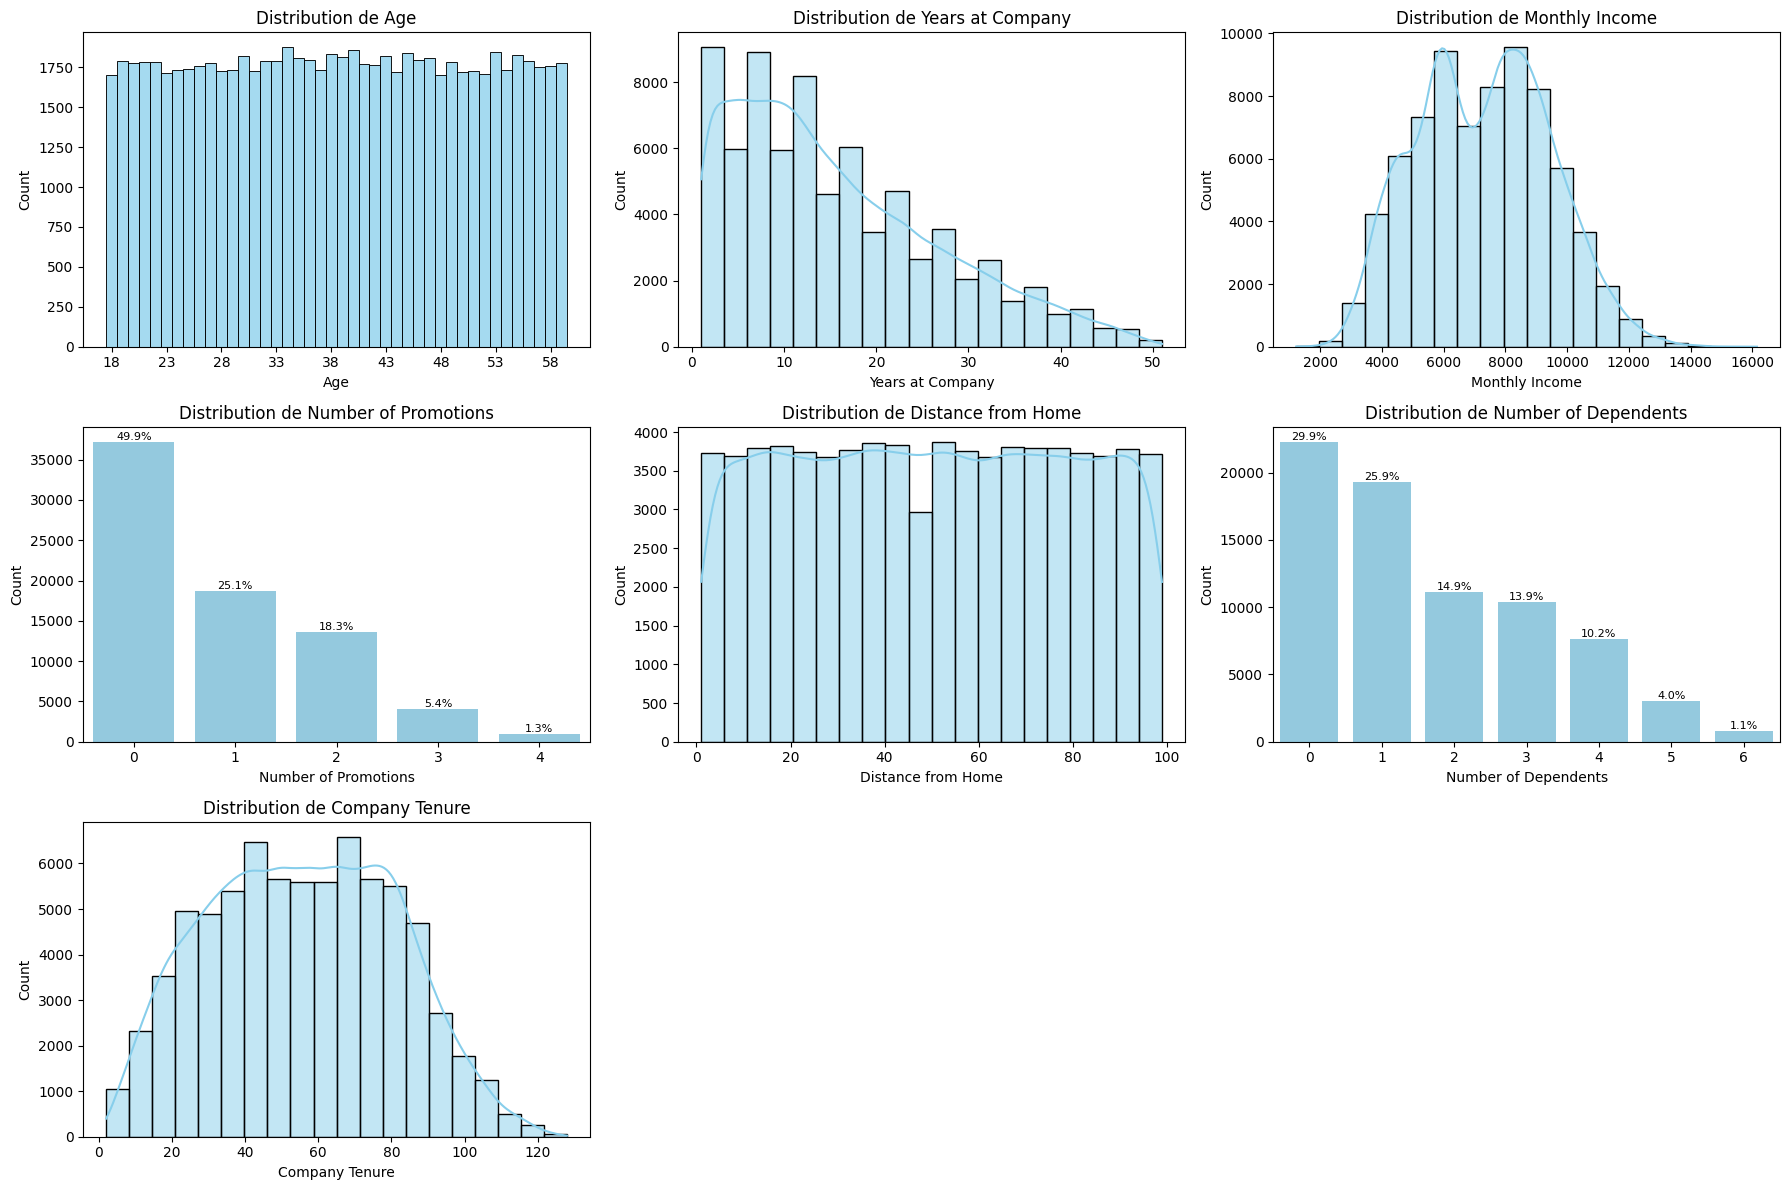

In [71]:
# Colonnes numériques
colonnes_num = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
# Exclure 'Employee ID' si présent
colonnes_num = [c for c in colonnes_num if c != "Employee ID"]

# Variables discrètes 
vars_discretes = {"Number of Promotions", "Number of Dependents"}

def annotate_percentages(ax, counts):
    """Ajoute les pourcentages au-dessus des barres d'un barplot."""
    total = counts.sum()
    for i, (x, y) in enumerate(zip(counts.index, counts.values)):
        pct = 100 * y / total if total else 0
        ax.text(i, y, f"{pct:.1f}%", ha="center", va="bottom", fontsize=8)

# Figure : Distributions variables numériques
n = len(colonnes_num)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
axes = axes.flatten()

for i, col in enumerate(colonnes_num):
    ax = axes[i]

    if col == "Age":
        cmin, cmax = int(df[col].min()), int(df[col].max())
        bins = np.arange(cmin - 0.5, cmax + 1.5, 1)
        sns.histplot(df[col], bins=bins, kde=False, color="skyblue", ax=ax)
        ax.set_xticks(range(cmin, cmax + 1, 5))
        ax.set_ylabel("Count")

    elif col in vars_discretes:
        vc = df[col].value_counts().sort_index()
        sns.barplot(x=vc.index, y=vc.values, color="skyblue", ax=ax)
        annotate_percentages(ax, vc)
        ax.set_ylabel("Count")

    else:
        sns.histplot(df[col], kde=True, bins=20, color="skyblue", ax=ax)

    ax.set_title(f"Distribution de {col}")
    ax.set_xlabel(col)

# Supprimer les axes vides
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



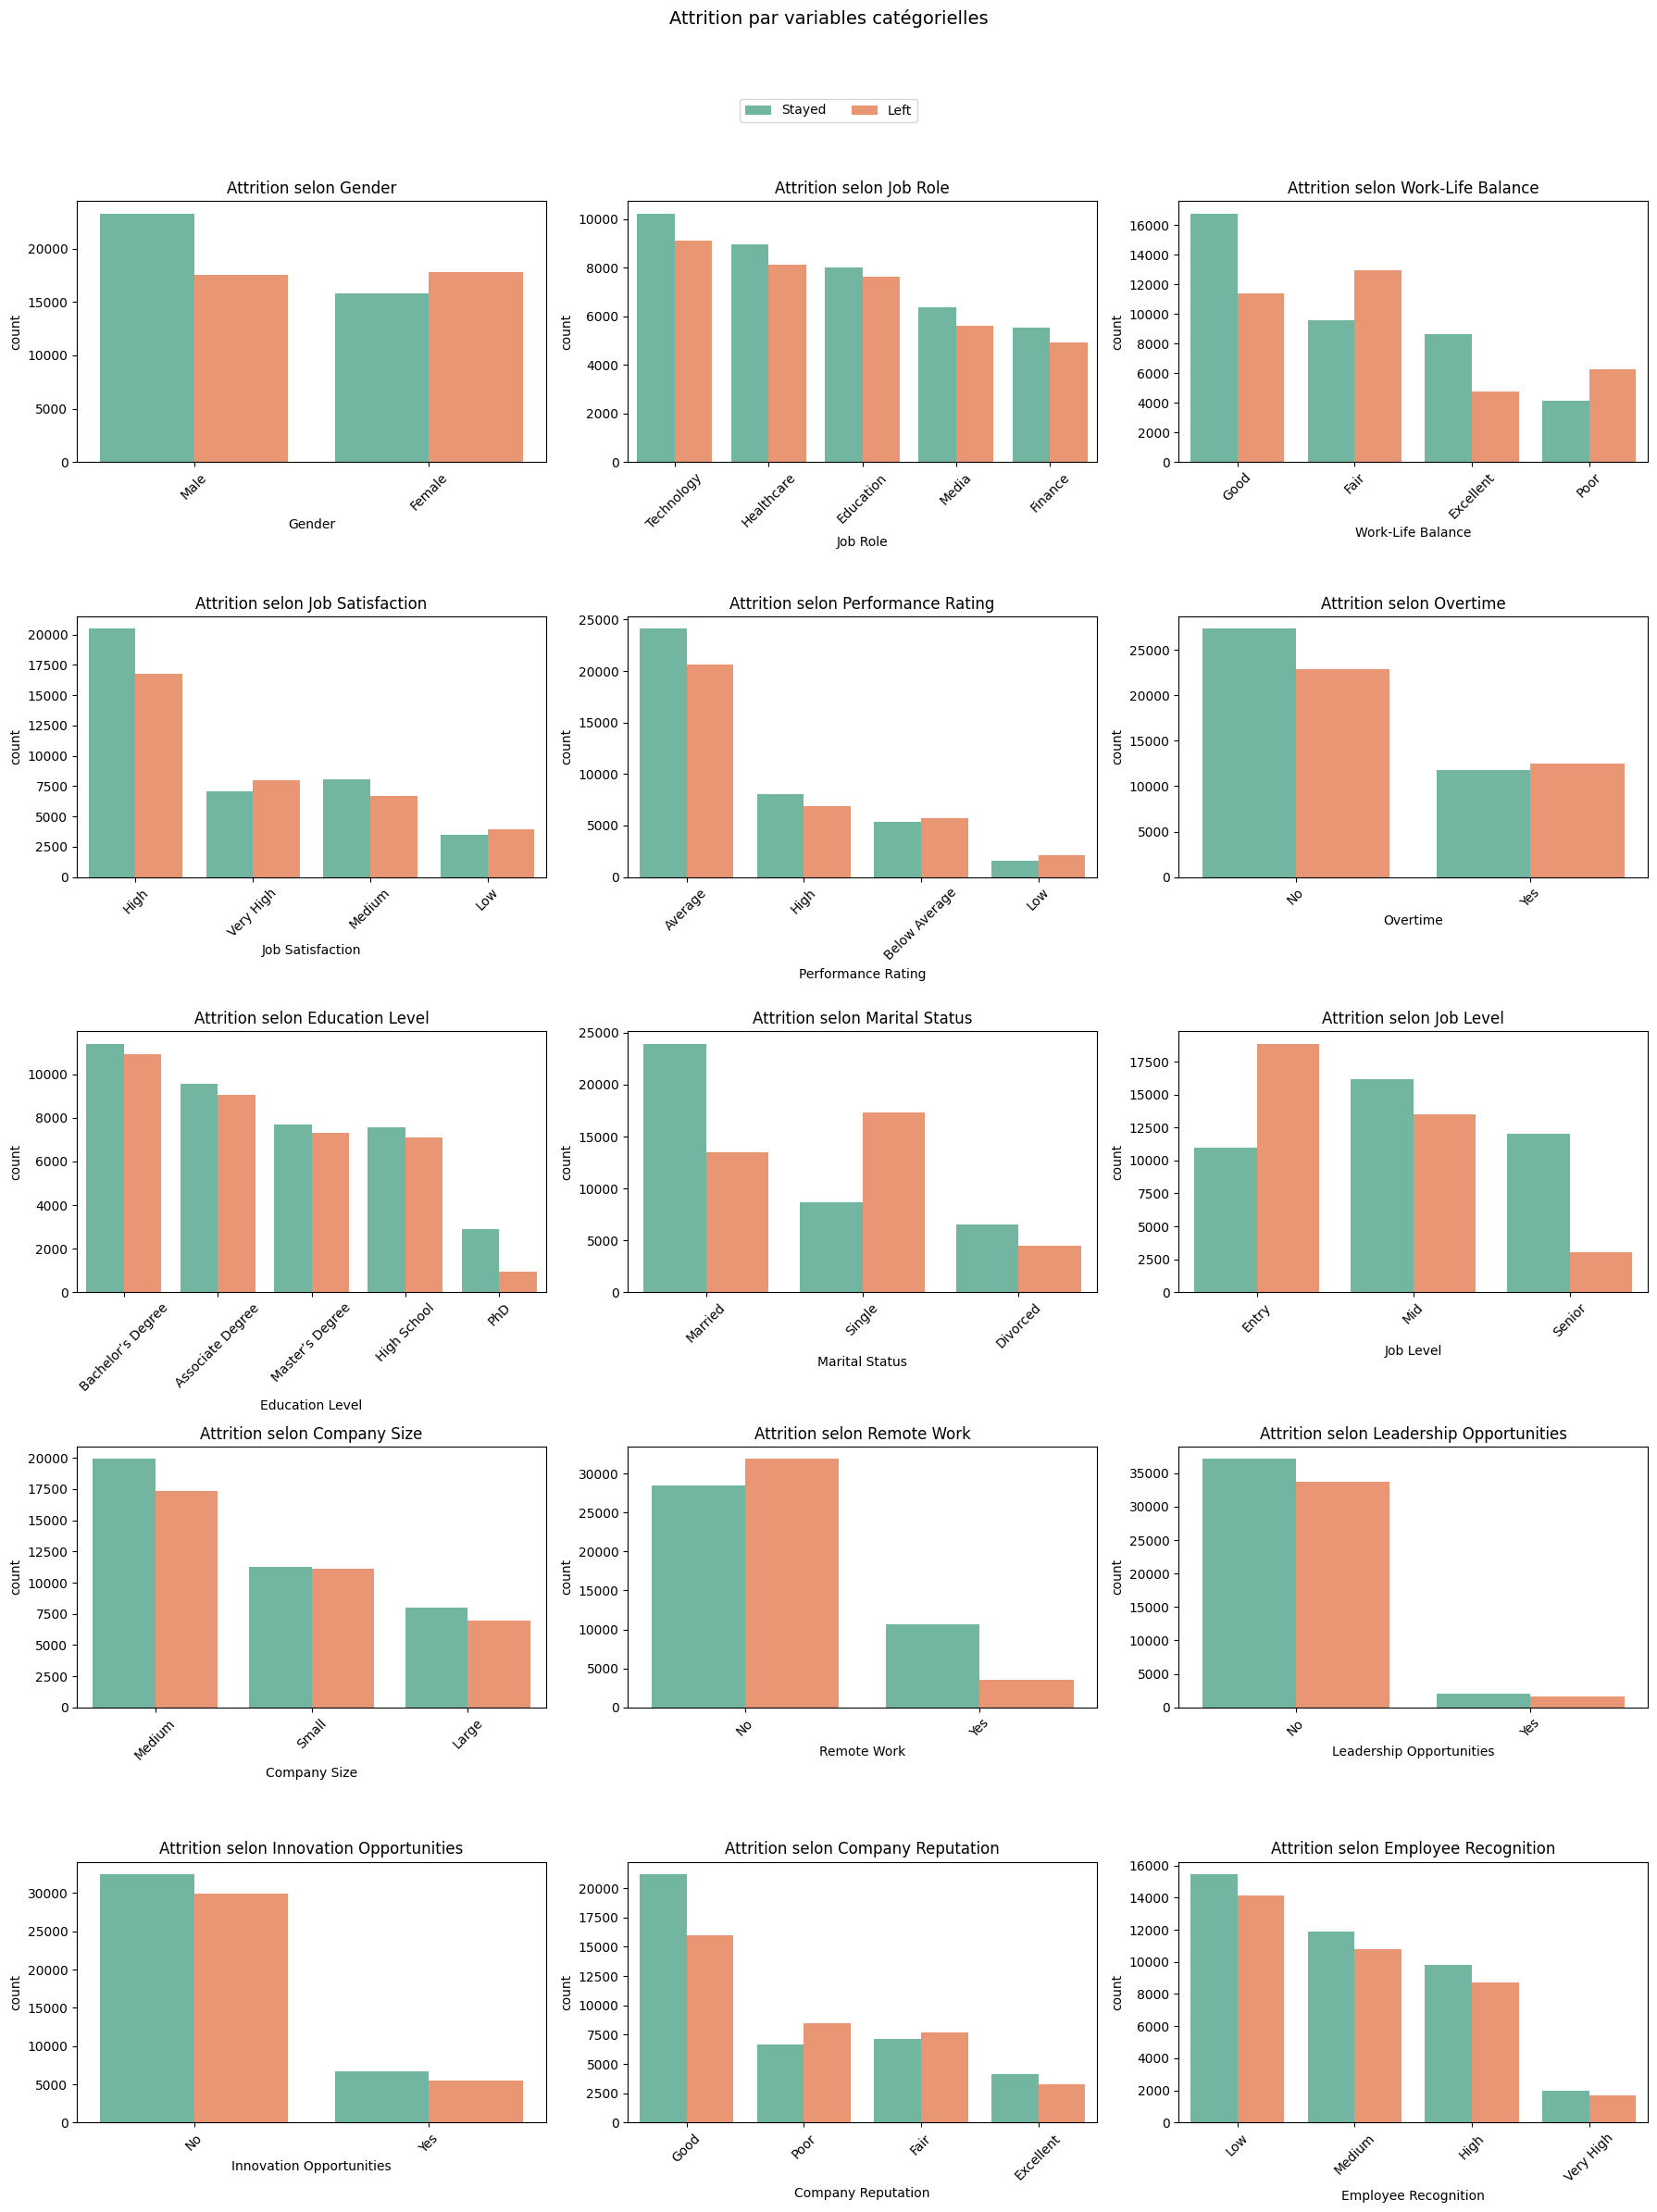

In [72]:
target = "Attrition"
assert target in df.columns, f"{target} manquant dans le DataFrame"

# Colonnes catégorielles (on exclut la cible)
colonnes_cat = df.select_dtypes(include="object").columns.drop(target)

# Grille de subplots
n = len(colonnes_cat)
cols = 3                            
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4.5*rows), sharey=False)
axes = axes.flatten()

legend_handles = None
legend_labels = None

for i, col in enumerate(colonnes_cat):
    ax = axes[i]
    order = df[col].value_counts(dropna=False).index

    g = sns.countplot(
        x=col, hue=target, data=df, order=order,
        palette="Set2", ax=ax
    )
    ax.set_title(f"Attrition selon {col}")
    ax.set_xlabel(col)
    ax.tick_params(axis="x", rotation=45)

    if legend_handles is None:
        legend_handles, legend_labels = g.get_legend_handles_labels()

    ax.get_legend().remove()


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

if legend_handles:
    fig.legend(
        legend_handles, legend_labels, loc="upper center",
        ncols=len(legend_labels), bbox_to_anchor=(0.5, 1.02)
    )

fig.suptitle("Attrition par variables catégorielles", y=1.06, fontsize=14)
plt.tight_layout()
plt.show()




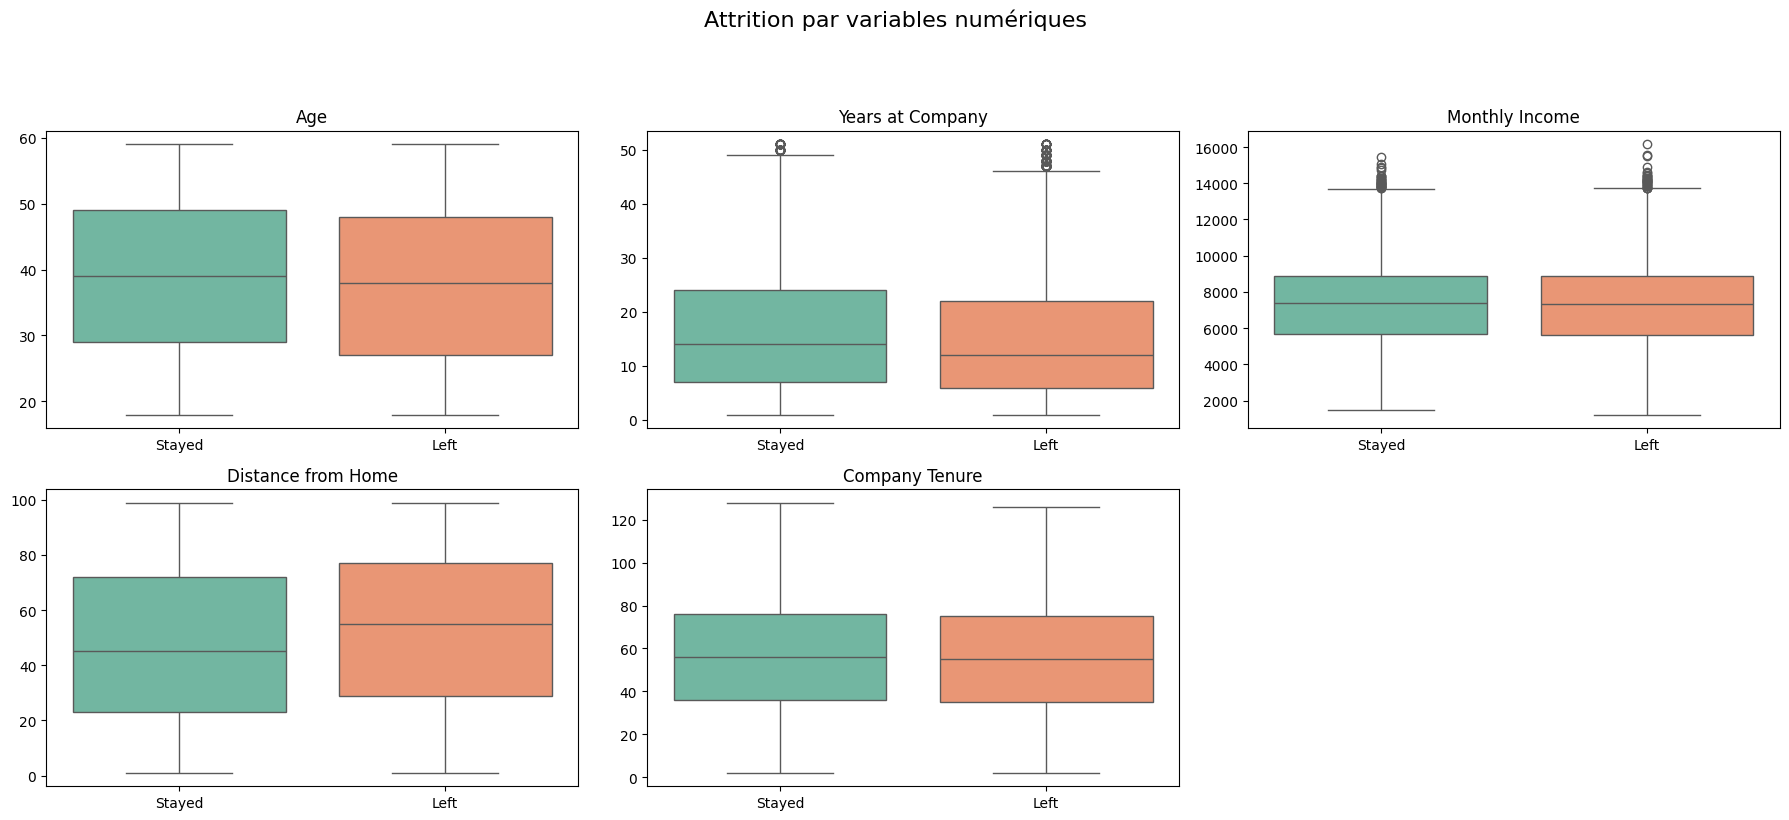


Moyenne des variables numériques selon Attrition :
                 Age  Years at Company  Monthly Income  Distance from Home  \
Attrition                                                                    
Left       37.884111         14.949703     7275.183913           52.805711   
Stayed     39.113371         16.419367     7321.251278           47.447736   

           Company Tenure  
Attrition                  
Left            54.953690  
Stayed          56.426907  


In [73]:
target = "Attrition"

# Colonnes numériques à tracer en boxplots (on exclut ID + variables discrètes)
colonnes_num = [
    col for col in df.select_dtypes(include=["int64", "float64"]).columns
    if col not in ["Employee ID", "Number of Dependents", "Number of Promotions"]
]

# Grille de subplots
n = len(colonnes_num)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
axes = axes.flatten()

handles_for_legend, labels_for_legend = None, None

for i, col in enumerate(colonnes_num):
    ax = axes[i]
    g = sns.boxplot(
        x=target, y=col, data=df,
        hue=target, palette="Set2",
        dodge=False, legend=False, ax=ax
    )
    ax.set_title(f"{col}")
    ax.set_xlabel("")
    ax.set_ylabel("")

    leg = g.get_legend()
    if leg is not None and handles_for_legend is None:
        handles_for_legend, labels_for_legend = leg.legend_handles, [t.get_text() for t in leg.texts]
        leg.remove()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Attrition par variables numériques", fontsize=16, y=1.02)

if handles_for_legend and labels_for_legend:
    fig.legend(handles_for_legend, labels_for_legend,
               loc="upper center", ncol=2, frameon=False, title=target)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 3. Moyennes comparées (groupby)
print("\nMoyenne des variables numériques selon Attrition :")
print(df.groupby(target)[colonnes_num].mean())


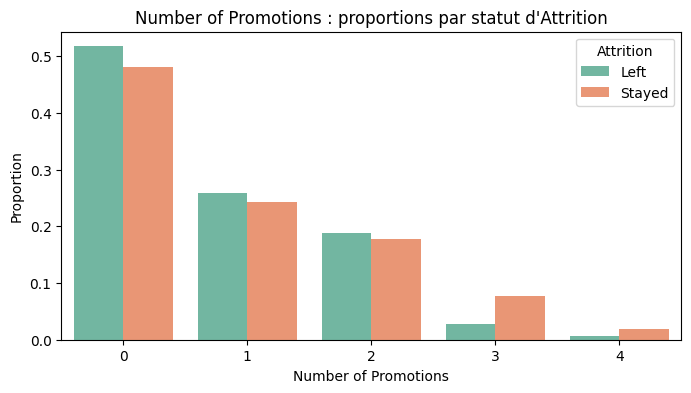

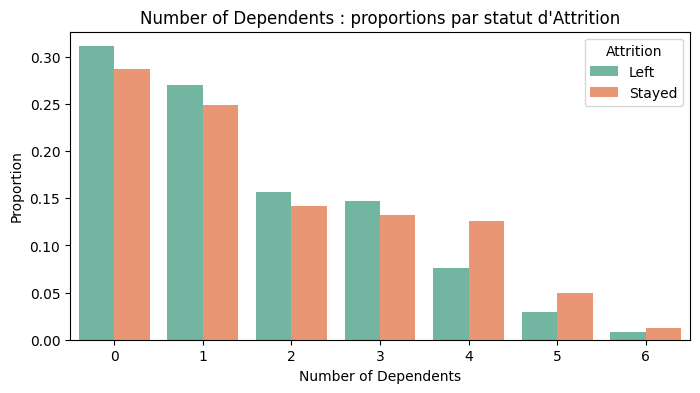

In [74]:
vars_discretes = {"Number of Promotions", "Number of Dependents"}
target = "Attrition"

for col in vars_discretes:
    if col not in df.columns:
        continue

    tmp = df.groupby([target, col], as_index=False).size()  
    tmp["Proportion"] = tmp["size"] / tmp.groupby(target)["size"].transform("sum")

    plt.figure(figsize=(8,4))
    sns.barplot(x=col, y="Proportion", hue=target, data=tmp, palette="Set2")
    plt.title(f"{col} : proportions par statut d'Attrition")
    plt.ylabel("Proportion")
    plt.xlabel(col)
    plt.show()


### 2. Pré-traitement des données + Split


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [76]:
# Colonnes numériques et catégorielles 
cat_cols = df.select_dtypes(include=["object","category"]).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Numériques :", num_cols)
print("Catégorielles :", cat_cols)

Numériques : ['Employee ID', 'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']
Catégorielles : ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']


In [77]:
# 1) Séparer X et y
TARGET = "Attrition"
id_cols = ["Employee ID"]

df_train = df.copy()  # garde DataFrame original
y = df_train[TARGET].map({"Stayed": 0, "Left": 1})
X = df_train.drop(columns=[TARGET] + [c for c in id_cols if c in df_train.columns], errors="ignore")

# 2) Split train/valid
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Colonnes depuis X_train uniquement
cat_cols = X_train.select_dtypes(include=["object","category"]).columns.tolist()
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# 4) Préprocesseur
num_pipe = Pipeline([
    ("scaler", StandardScaler())
])
cat_pipe = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

# 5) Fit seulement sur X_train !
preprocessor.fit(X_train)

# 6) Transform sur chaque split
X_train_enc = preprocessor.transform(X_train)
X_valid_enc = preprocessor.transform(X_test)

# 7) Récupérer les noms de features encodés
try:
    feature_names = preprocessor.get_feature_names_out()
except:
    cat_names = preprocessor.named_transformers_["cat"].named_steps["encoder"].get_feature_names(cat_cols)
    feature_names = np.r_[num_cols, cat_names]

# 8) Convertir en DataFrame
X_train_enc = pd.DataFrame(X_train_enc, columns=feature_names, index=X_train.index)
X_test_enc = pd.DataFrame(X_valid_enc, columns=feature_names, index=X_test.index)

print("Train enc:", X_train_enc.shape)
print("Valid enc:", X_test_enc.shape)


Train enc: (59598, 56)
Valid enc: (14900, 56)


### 4. Le modèle

Nous testons 3 modèles différents : une régression logistique, un random forest et un XGBoost.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, RocCurveDisplay
)
from sklearn.pipeline import Pipeline
import numpy as np

=== Comparatif de modèles ===
              Accuracy  Precision(Left=1)  Recall(Left=1)  F1(Left=1)  ROC-AUC
Model                                                                         
XGBoost         0.7528             0.7277          0.7659      0.7463   0.8483
LogReg          0.7493             0.7254          0.7594      0.7420   0.8416
RandomForest    0.7478             0.7380          0.7267      0.7323   0.8371


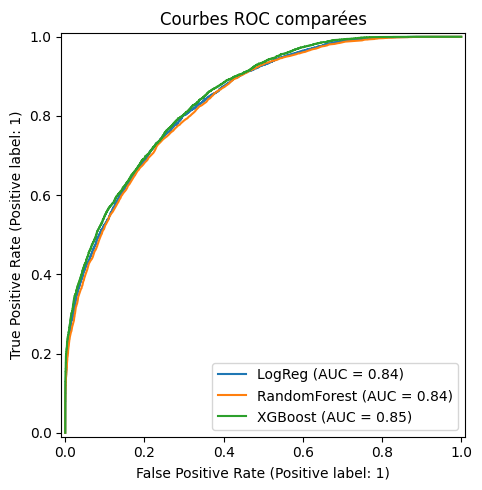

In [ ]:


neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale_pos_weight = (neg / pos) if pos > 0 else 1.0

# Chaque modèle est un Pipeline
models = {
    "LogReg": Pipeline([
        ("prep", preprocessor),  # sera FIT sur X_train uniquement lors du .fit(...)
        ("clf", LogisticRegression(
            max_iter=2000, solver="lbfgs", random_state=42,
            class_weight="balanced"
        ))
    ]),

    "RandomForest": Pipeline([
        ("prep", preprocessor),
        ("clf", RandomForestClassifier(
            n_estimators=400, max_depth=None, random_state=42, n_jobs=-1,
            class_weight="balanced"
        ))
    ]),

    "XGBoost": Pipeline([
        ("prep", preprocessor),
        ("clf", XGBClassifier(
            n_estimators=400, max_depth=4, learning_rate=0.1,
            subsample=0.8, colsample_bytree=0.8,
            random_state=42, n_jobs=-1, eval_metric="logloss",
            scale_pos_weight=scale_pos_weight
        ))
    ])
}

# Entraîner & évaluer
rows = []
y_probas = {}
for name, pipe in models.items():
    # fit: le preprocessor est FIT sur X_train uniquement
    pipe.fit(X_train, y_train)

    # prédictions sur X_test
    y_pred = pipe.predict(X_test)

    # probabilités pour ROC/AUC
    if hasattr(pipe.named_steps["clf"], "predict_proba"):
        y_proba = pipe.predict_proba(X_test)[:, 1]
    else:
        d = pipe.decision_function(X_test)
        y_proba = (d - d.min()) / (d.max() - d.min() + 1e-9)

    y_probas[name] = y_proba

    rows.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision(Left=1)": precision_score(y_test, y_pred, pos_label=1),
        "Recall(Left=1)": recall_score(y_test, y_pred, pos_label=1),
        "F1(Left=1)": f1_score(y_test, y_pred, pos_label=1),
        "ROC-AUC": roc_auc_score(y_test, y_proba),
    })

results = pd.DataFrame(rows).set_index("Model").sort_values("ROC-AUC", ascending=False)
print("=== Comparatif de modèles ===")
print(results.round(4))

# Courbes ROC comparées
plt.figure(figsize=(6,5))
for name, proba in y_probas.items():
    RocCurveDisplay.from_predictions(y_test, proba, name=f"{name}", ax=plt.gca())
plt.title("Courbes ROC comparées")
plt.tight_layout()
plt.show()


Nous choisissons finalement le modèle XGBoost qui a la meilleure performance.

On effectue maintenant une cross-validation afin d’évaluer la performance réelle du modèle XGBoost. Cela permet de vérifier sa stabilité et sa capacité de généralisation en testant le modèle sur plusieurs découpages du jeu d’entraînement, plutôt que sur une seule séparation aléatoire.

In [ ]:
# Cross-validation du modèle gagnant (XGBoost)


neg, pos = (y == 0).sum(), (y == 1).sum()
scale_pos_weight = (neg / pos) if pos > 0 else 1.0

xgb_pipe = Pipeline([
    ("prep", preprocessor), 
    ("clf", XGBClassifier(
        n_estimators=400, max_depth=6, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        random_state=42, n_jobs=-1, eval_metric="logloss",
        scale_pos_weight=scale_pos_weight
    ))
])

# StratifiedKFold pour conserver le ratio Stayed/Left dans chaque fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Multiples métriques
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

cv_results = cross_validate(
    xgb_pipe, X, y,
    scoring=scoring, cv=cv, n_jobs=-1,
    return_train_score=False
)

# Résumé
cv_df = pd.DataFrame(cv_results)
summary = cv_df.filter(like="test_").agg(["mean","std"]).T
summary.columns = ["mean","std"]
print("=== XGBoost 5-fold CV (stratified) ===")
print(summary.round(4))

# tableau par fold
per_fold = pd.DataFrame({
    "fold": range(1, cv_df.shape[0]+1),
    "accuracy": cv_df["test_accuracy"],
    "precision": cv_df["test_precision"],
    "recall": cv_df["test_recall"],
    "f1": cv_df["test_f1"],
    "roc_auc": cv_df["test_roc_auc"],
})
print("\nScores par fold :")
print(per_fold.round(4))


=== XGBoost 5-fold CV (stratified) ===
                  mean     std
test_accuracy   0.7530  0.0021
test_precision  0.7316  0.0027
test_recall     0.7578  0.0017
test_f1         0.7444  0.0019
test_roc_auc    0.8435  0.0019

Scores par fold :
   fold  accuracy  precision  recall      f1  roc_auc
0     1    0.7532     0.7319  0.7576  0.7445   0.8442
1     2    0.7515     0.7301  0.7563  0.7430   0.8407
2     3    0.7540     0.7335  0.7567  0.7449   0.8454
3     4    0.7558     0.7345  0.7605  0.7473   0.8447
4     5    0.7505     0.7279  0.7577  0.7425   0.8425


Ici, nous allons comparer les performances du XGBoost entre train et test afin de vérifier s’il existe un écart important, signe d’overfitting, et ajuster le modèle si nécessaire.

=== Train vs Test (XGBoost) ===
Set          Test   Train
Metric                   
Accuracy   0.7528  0.7835
Precision  0.7277  0.7609
Recall     0.7659  0.7933
F1         0.7463  0.7767
ROC_AUC    0.8483  0.8757


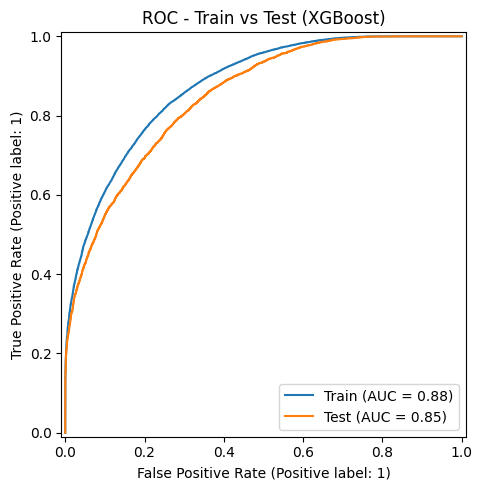

In [80]:
def eval_split(pipe, X_train, y_train, X_test, y_test):
    pipe.fit(X_train, y_train)

    # TRAIN
    y_pred_train  = pipe.predict(X_train)
    y_proba_train = pipe.predict_proba(X_train)[:, 1]

    # TEST
    y_pred_test  = pipe.predict(X_test)
    y_proba_test = pipe.predict_proba(X_test)[:, 1]

    metrics = {
        "Train_Accuracy":  accuracy_score(y_train, y_pred_train),
        "Test_Accuracy":   accuracy_score(y_test, y_pred_test),
        "Train_Precision": precision_score(y_train, y_pred_train, pos_label=1),
        "Test_Precision":  precision_score(y_test, y_pred_test, pos_label=1),
        "Train_Recall":    recall_score(y_train, y_pred_train, pos_label=1),
        "Test_Recall":     recall_score(y_test, y_pred_test, pos_label=1),
        "Train_F1":        f1_score(y_train, y_pred_train, pos_label=1),
        "Test_F1":         f1_score(y_test, y_pred_test, pos_label=1),
        "Train_ROC_AUC":   roc_auc_score(y_train, y_proba_train),
        "Test_ROC_AUC":    roc_auc_score(y_test, y_proba_test),
    }
    return metrics, y_proba_train, y_proba_test

# Notre modele gagnant
best_pipe = models["XGBoost"]

metrics, proba_train, proba_test = eval_split(best_pipe, X_train, y_train, X_test, y_test)

df_met = (pd.Series(metrics)
          .rename_axis("Metric")
          .to_frame("Score")
          .assign(Set=lambda d: d.index.str.split("_").str[0])
          .assign(Metric=lambda d: d.index.str.split("_").str[1:].str.join("_"))
          .pivot(index="Metric", columns="Set", values="Score")
          .loc[["Accuracy","Precision","Recall","F1","ROC_AUC"]]
          .round(4)
         )
print("=== Train vs Test (XGBoost) ===")
print(df_met)

# Courbes ROC Train vs Test (utile pour voir l'écart)
plt.figure(figsize=(6,5))
RocCurveDisplay.from_predictions(y_train, proba_train, name="Train", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test,  proba_test,  name="Test",  ax=plt.gca())
plt.title("ROC - Train vs Test (XGBoost)")
plt.tight_layout()
plt.show()

On remarque ici un overfitting, alors on va adapter les paramètres du modèle pour essayer de le réduire.

Best iteration: 49  -> ntree: 50

=== Évaluation TEST (XGBoost + ES) ===
Accuracy     0.7552
Precision    0.7305
Recall       0.7675
F1           0.7485
ROC-AUC      0.8494
dtype: float64

=== Train vs Test ===
       ROC_AUC      F1  Recall  Precision
Train   0.8599  0.7596  0.7765     0.7435
Test    0.8494  0.7485  0.7675     0.7305


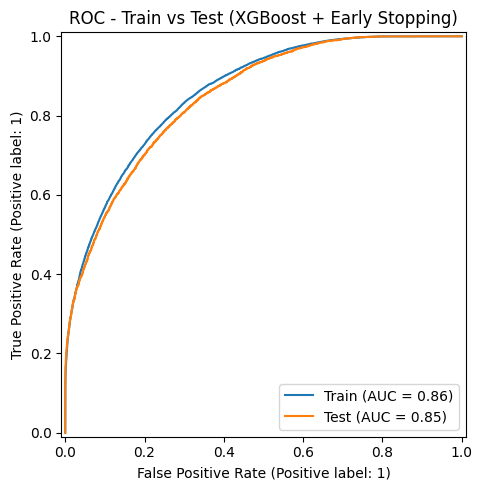

In [81]:
# XGBoost avec early stopping (via xgboost.train) + régularisation
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
import xgboost as xgb


neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale_pos_weight = float(neg / pos) if pos > 0 else 1.0

prep = clone(preprocessor).fit(X_train)
Xtr = prep.transform(X_train)
Xte = prep.transform(X_test)

Xtr = np.asarray(Xtr, dtype=np.float32)
Xte = np.asarray(Xte, dtype=np.float32)
ytr = np.asarray(y_train)
yte = np.asarray(y_test)


feature_names = prep.get_feature_names_out()
feature_names = [str(n) for n in feature_names] 

dtrain = xgb.DMatrix(Xtr, label=ytr, feature_names=feature_names)
dtest  = xgb.DMatrix(Xte, label=yte, feature_names=feature_names)

# Paramètres — régularisation pour calmer l’overfitting
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.3,             
    "max_depth": 4,
    "min_child_weight": 2,
    "gamma": 0.7,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "lambda": 2.0,           
    "alpha": 0.1,          
    "scale_pos_weight": scale_pos_weight,
    "seed": 42
}

# Early stopping
evals = [(dtrain, "train"), (dtest, "test")]
booster = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=3000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=False
)

# Récupère la meilleure itération
best_iter = getattr(booster, "best_iteration", None)
if best_iter is not None:
    best_ntree = best_iter + 1
else:
    best_ntree = booster.num_boosted_rounds()
print("Best iteration:", best_iter, " -> ntree:", best_ntree)

# Prédictions & métriques (TEST)
proba_test  = booster.predict(dtest, iteration_range=(0, best_ntree))
pred_test   = (proba_test >= 0.5).astype(int)

res_test = pd.Series({
    "Accuracy":  accuracy_score(yte, pred_test),
    "Precision": precision_score(yte, pred_test, pos_label=1),
    "Recall":    recall_score(yte, pred_test, pos_label=1),
    "F1":        f1_score(yte, pred_test, pos_label=1),
    "ROC-AUC":   roc_auc_score(yte, proba_test),
}).round(4)
print("\n=== Évaluation TEST (XGBoost + ES) ===")
print(res_test)

# Overfitting check (TRAIN vs TEST)
proba_train = booster.predict(dtrain, iteration_range=(0, best_ntree))
pred_train  = (proba_train >= 0.5).astype(int)

ovf = pd.DataFrame({
    "ROC_AUC": [roc_auc_score(ytr, proba_train), roc_auc_score(yte, proba_test)],
    "F1":      [f1_score(ytr, pred_train, pos_label=1), f1_score(yte, pred_test, pos_label=1)],
    "Recall":  [recall_score(ytr, pred_train, pos_label=1), recall_score(yte, pred_test, pos_label=1)],
    "Precision":[precision_score(ytr, pred_train, pos_label=1), precision_score(yte, pred_test, pos_label=1)]
}, index=["Train","Test"]).round(4)
print("\n=== Train vs Test ===")
print(ovf)

# ROC — Train vs Test
plt.figure(figsize=(6,5))
RocCurveDisplay.from_predictions(ytr, proba_train, name="Train", ax=plt.gca())
RocCurveDisplay.from_predictions(yte, proba_test,  name="Test",  ax=plt.gca())
plt.title("ROC - Train vs Test (XGBoost + Early Stopping)")
plt.tight_layout()
plt.show()


Les performances entre train (AUC = 0.86) et test (AUC = 0.85) sont très proches, ce qui montre une bonne généralisation du modèle. On observe encore une légère différence, mais elle reste faible, ce qui suggère que l’overfitting a été fortement limité sans disparaître totalement.

### 4. Interprétabilité du modèle

In [ ]:
# Afficher toutes les colonnes sans coupure
pd.set_option("display.max_colwidth", None)

# Données
data = [
    ("Employee ID", "A unique identifier assigned to each employee."),
    ("Age", "The age of the employee, ranging from 18 to 60 years."),
    ("Gender", "The gender of the employee."),
    ("Years at Company", "The number of years the employee has been working at the company."),
    ("Monthly Income", "The monthly salary of the employee, in dollars."),
    ("Job Role", "The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media."),
    ("Work-Life Balance", "The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent)."),
    ("Job Satisfaction", "The employee's satisfaction with their job (Very Low, Low, Medium, High)."),
    ("Performance Rating", "The employee's performance rating (Low, Below Average, Average, High)."),
    ("Number of Promotions", "The total number of promotions the employee has received."),
    ("Distance from Home", "The distance between the employee's home and workplace, in miles."),
    ("Education Level", "The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD)."),
    ("Marital Status", "The marital status of the employee (Divorced, Married, Single)."),
    ("Job Level", "The job level of the employee (Entry, Mid, Senior)."),
    ("Company Size", "The size of the company the employee works for (Small, Medium, Large)."),
    ("Company Tenure", "The total number of years the employee has been working in the industry."),
    ("Remote Work", "Whether the employee works remotely (Yes or No)."),
    ("Overtime", "Whether the employee works overtime (Yes/No)."),
    ("Innovation Opportunities", "Whether the employee has opportunities for innovation (Yes or No)."),
    ("Company Reputation", "The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent)."),
    ("Employee Recognition", "The level of recognition the employee receives (Very Low, Low, Medium, High)."),
    ("Attrition", "Whether the employee has left the company, encoded as 0 (Stayed) and 1 (Left)."),
    ("Number of Dependents", "Nombre de personnes à charge")
]

# Création du DataFrame
df_variables = pd.DataFrame(data, columns=["Variable", "Description"])

# Affichage
df_variables


,Variable,Description
0,Employee ID,A unique identifier assigned to each employee.
1,Age,"The age of the employee, ranging from 18 to 60 years."
2,Gender,The gender of the employee.
3,Years at Company,The number of years the employee has been working at the company.
4,Monthly Income,"The monthly salary of the employee, in dollars."
5,Job Role,"The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media."
6,Work-Life Balance,"The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent)."
7,Job Satisfaction,"The employee's satisfaction with their job (Very Low, Low, Medium, High)."
8,Performance Rating,"The employee's performance rating (Low, Below Average, Average, High)."
9,Number of Promotions,The total number of promotions the employee has received.


In [83]:
import shap
shap.initjs()  


# Explainer (XGBoost)
explainer = shap.TreeExplainer(booster)

# SHAP sur TEST
try:
    sv_test = explainer(Xte)
    shap_mat_test = sv_test.values            
    base_value = np.asarray(sv_test.base_values).mean()
except Exception:
    shap_mat_test = explainer.shap_values(Xte)
    bv = explainer.expected_value
    base_value = float(np.mean(bv)) if np.ndim(bv) else float(bv)

print("SHAP matrix (test):", shap_mat_test.shape, "| base_value (log-odds)≈", round(base_value, 4))


SHAP matrix (test): (14900, 56) | base_value (log-odds)≈ -0.0079


In [84]:
enc_names = feature_names.tolist() if hasattr(feature_names, "tolist") else list(feature_names)

def base_name(enc: str) -> str:
    if "__" in enc:
        enc = enc.split("__", 1)[1]
    if "_" in enc:
        return enc.rsplit("_", 1)[0]
    return enc

group_idx = {}
for j, nm in enumerate(enc_names):
    group_idx.setdefault(base_name(nm), []).append(j)


=== Top 20 (SHAP agrégés) ===


,Feature,Mean|SHAP|
0,Marital Status,0.779574
1,Job Level,0.725515
2,Work-Life Balance,0.549963
3,Remote Work,0.520684
4,Distance from Home,0.301557
5,Company Reputation,0.291807
6,Gender,0.284804
7,Number of Dependents,0.207879
8,Years at Company,0.206186
9,Job Satisfaction,0.186681


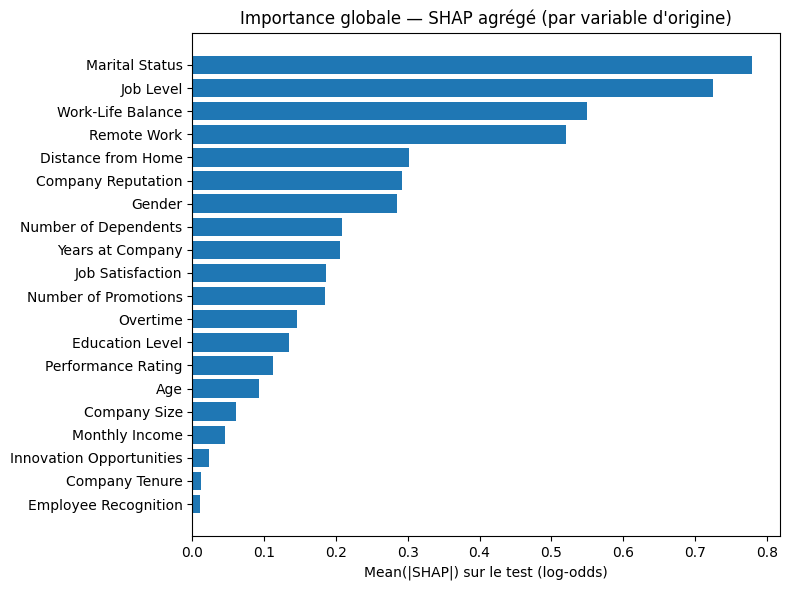

In [85]:
## SHAP global agrégé par variable d’origine

mean_abs_agg = {
    b: np.mean(np.abs(shap_mat_test[:, idxs].sum(axis=1)))
    for b, idxs in group_idx.items()
}

df_global = (pd.Series(mean_abs_agg, name="Mean|SHAP|")
             .sort_values(ascending=False)
             .to_frame()
             .reset_index()
             .rename(columns={"index": "Feature"}))

print("=== Top 20 (SHAP agrégés) ===")
display(df_global.head(20))

plt.figure(figsize=(8,6))
top = df_global.head(20)
plt.barh(top["Feature"][::-1], top["Mean|SHAP|"][::-1])
plt.title("Importance globale — SHAP agrégé (par variable d'origine)")
plt.xlabel("Mean(|SHAP|) sur le test (log-odds)")
plt.tight_layout(); plt.show()


- SHAP agrégé par variable d’origine veut dire :
on regroupe toutes les colonnes issues d’une même variable (ex. les 3 colonnes OHE de Marital Status) et on additionne leurs contributions pour avoir un seul score global par variable.

        Ça permet de retrouver une interprétation lisible : “Marital Status est globalement important” au lieu de voir trois barres différentes.

- Méthode de calcul pour avoir SHAP agrégé par variable d’origine :

        “Mean(|SHAP|) sur le test (log-odds)” = importance moyenne absolue d’une variable, calculée sur l’échantillon de test, mesurée en log-odds.

Plus une barre est longue, plus la variable contribue en moyenne aux prédictions du modèle (que ce soit pour augmenter ou diminuer la probabilité d’attrition).

Ce graphique ne dit pas dans quel sens la variable agit (positif = risque ↑, négatif = risque ↓), seulement à quel point elle compte globalement.

**Interprétation du graphique** 

- Marital Status, Job Level, Work-Life Balance → ce sont les facteurs les plus déterminants pour expliquer les départs.

- Ensuite viennent Remote Work, Distance from Home, Company Reputation et Gender qui ont aussi un poids non négligeable.

,Feature,SHAP
0,Marital Status,1.185835
1,Job Level,0.888587
2,Job Satisfaction,0.347194
3,Work-Life Balance,-0.342209
4,Remote Work,0.328130
5,Distance from Home,0.325913
6,Company Reputation,0.290372
7,Gender,-0.255096
8,Overtime,0.201324
9,Number of Dependents,0.145715


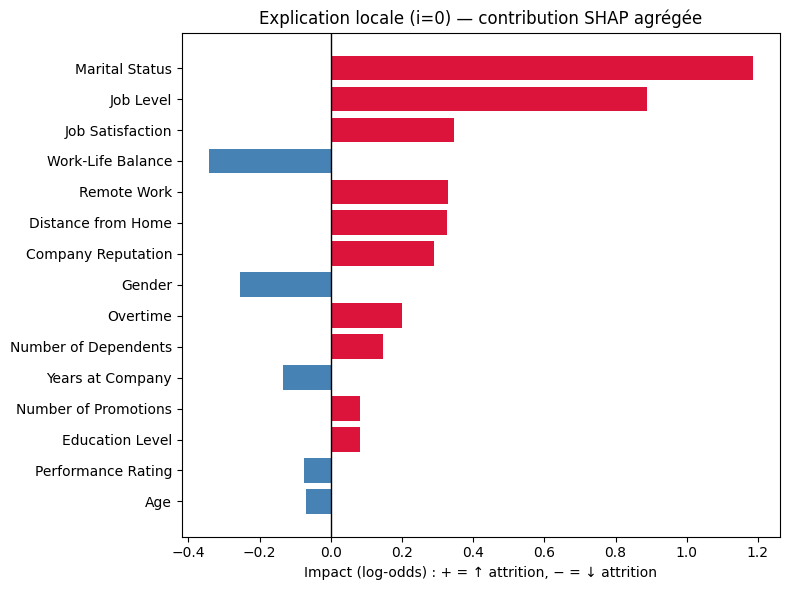

In [86]:
## SHAP local agrégé (explication individuelle)

def shap_local_aggregated(i=0, topk=15):
    contribs = {b: shap_mat_test[i, idxs].sum() for b, idxs in group_idx.items()}
    df_local = (pd.Series(contribs, name="SHAP")
                .sort_values(key=np.abs, ascending=False)
                .to_frame()
                .reset_index()
                .rename(columns={"index":"Feature"}))
    display(df_local.head(topk))

    plt.figure(figsize=(8,6))
    top = df_local.head(topk)
    colors = top["SHAP"].apply(lambda v: "crimson" if v>0 else "steelblue")
    plt.barh(top["Feature"][::-1], top["SHAP"][::-1], color=colors[::-1])
    plt.axvline(0, color="black", lw=1)
    plt.title(f"Explication locale (i={i}) — contribution SHAP agrégée")
    plt.xlabel("Impact (log-odds) : + = ↑ attrition, − = ↓ attrition")
    plt.tight_layout(); plt.show()
    return df_local

_ = shap_local_aggregated(i=0, topk=15)


- Le SHAP local permet d’expliquer la prédiction du modèle pour un employé donné. Il identifie les facteurs spécifiques qui augmentent ou réduisent son risque de départ, ce qui permet de passer d’une analyse globale (tendances générales) à une explication individualisée (cas par cas).


**Résultat pour l’employé i=0**

-  Facteurs qui augmentent fortement le risque :

        Marital Status et Job Level → ce sont les deux contributions majeures (environ +1.2 et +0.9 log-odds), qui tirent fortement la prédiction vers l’attrition.

        Dans une moindre mesure : Job Satisfaction, Remote Work, Distance from Home, Company Reputation (+0.2 à +0.3 log-odds chacun).

- Facteurs qui réduisent le risque :

        Work-Life Balance (≈ –0.3 log-odds) et Gender (≈ –0.25 log-odds) → les freins principaux à l’attrition.

        Years at Company et dans une moindre mesure Age et Performance Rating apportent aussi une contribution négative, mais plus faible.

Pour l’individu i=0, le modèle estime un risque d’attrition élevé, principalement expliqué par son statut marital et son niveau de poste.

Cet employé mérite une attention particulière car il est considéré comme à risque par le modèle.


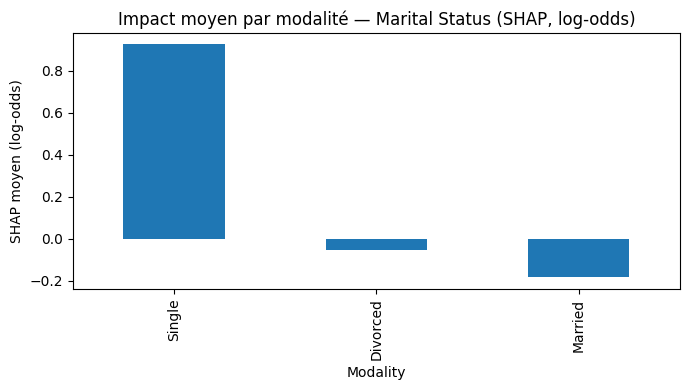

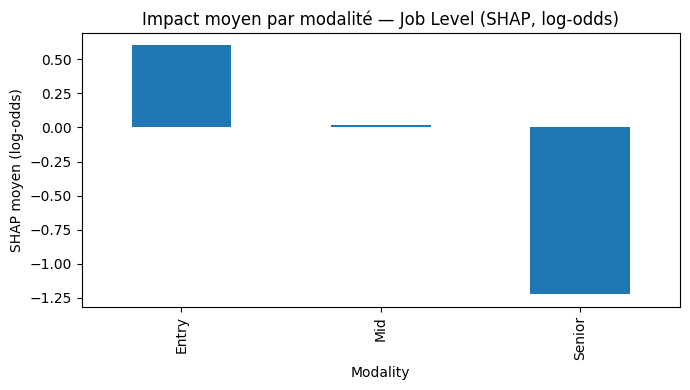

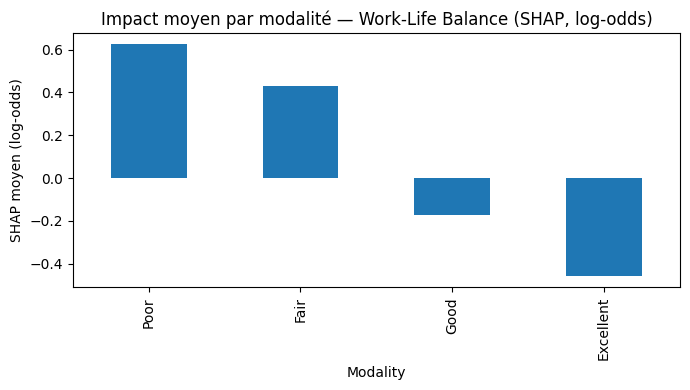

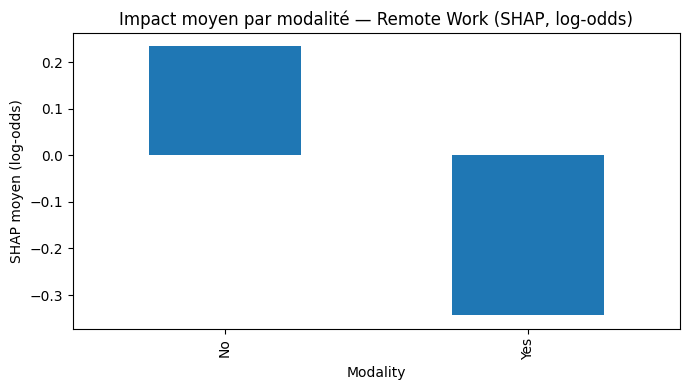

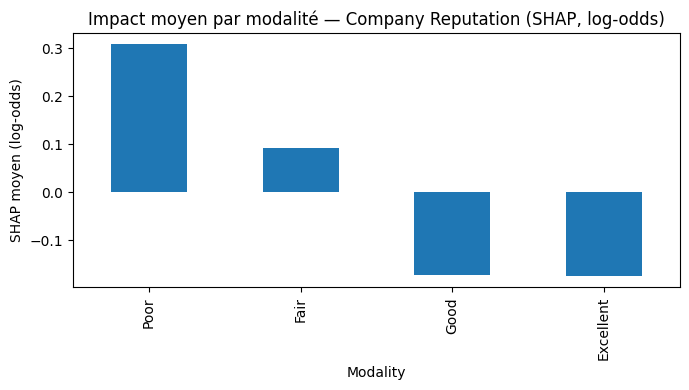

In [87]:
# SHAP par modalité pour les features les plus importantes

def modality_name(enc: str) -> str:
    # "cat__Marital Status_Single" -> "Single"
    if "__" in enc: enc = enc.split("__", 1)[1]
    if "_" in enc:  return enc.rsplit("_", 1)[1]
    return enc

def shap_by_modality_active(feature: str):
    idxs = group_idx.get(feature, [])
    if not idxs:
        print("Feature inconnue:", feature); return

    X_block = Xte[:, idxs]
    active_idx = X_block.argmax(axis=1)

    shap_active = np.array([shap_mat_test[r, idxs[active_idx[r]]] for r in range(X_block.shape[0])])
    active_names = [modality_name(enc_names[idxs[active_idx[r]]]) for r in range(X_block.shape[0])]

    dfm = pd.DataFrame({"Modality": active_names, "SHAP": shap_active})
    rep = (dfm.groupby("Modality")["SHAP"]
              .agg(["count","mean","median"])
              .sort_values("mean", ascending=False))


    plt.figure(figsize=(7,4))
    rep["mean"].plot(kind="bar")
    plt.title(f"Impact moyen par modalité — {feature} (SHAP, log-odds)")
    plt.ylabel("SHAP moyen (log-odds)")
    plt.tight_layout(); plt.show()
    

# Exemple :
shap_by_modality_active("Marital Status")
shap_by_modality_active("Job Level")
shap_by_modality_active("Work-Life Balance")
shap_by_modality_active("Remote Work")
shap_by_modality_active("Company Reputation")



*Le SHAP par modalité permet de zoomer dans la variable et de voir :*

- quelle modalité augmente le risque (valeurs positives),

- quelle modalité réduit le risque (valeurs négatives),

- et quelle modalité n’a quasiment pas d’impact (proche de 0).

*Marital Status*

- Single : SHAP moyen ≈ +0.92 log-odds → être célibataire augmente fortement le risque de départ.

- Divorced : SHAP moyen ≈ –0.05 log-odds (proche de 0) → effet quasi neutre, pas vraiment d’impact.

- Married : SHAP moyen ≈ –0.18 log-odds → être marié réduit légèrement le risque de départ.

        Interprétation : le modèle montre que les employés célibataires présentent un risque de départ nettement plus élevé, tandis que les employés mariés semblent davantage fidélisés, et les divorcés n’affichent pas d’impact significatif sur l’attrition.

*Job Level*

- Entry : SHAP moyen ≈ +0.55 log-odds → les employés débutants (Entry) sont plus à risque de quitter l’entreprise.

- Mid : SHAP ≈ 0 → quasiment aucun effet, ni positif ni négatif sur l’attrition.

- Senior : SHAP moyen ≈ –1.2 log-odds → les employés seniors ont au contraire beaucoup moins de risque de départ.

        Interprétation : le modèle montre que les débutants sont les plus vulnérables, alors que les profils seniors sont bien plus stables.

*Work-Life Balance*

- Poor : SHAP moyen ≈ +0.62 log-odds → un mauvais équilibre vie pro/perso augmente fortement le risque d’attrition.

- Fair : SHAP ≈ +0.43 → impact encore positif mais un peu moindre.

- Good : SHAP ≈ –0.12 → effet protecteur, réduit légèrement le risque.

- Excellent : SHAP ≈ –0.42 → effet très protecteur, les employés avec un excellent équilibre sont bien moins susceptibles de partir.

        Interprétation : plus l’équilibre vie professionnelle/personnelle est bon, moins les employés sont enclins à quitter l’entreprise.

*Remote Work*

- No : SHAP moyen ≈ +0.23 log-odds → les employés qui ne travaillent pas à distance présentent un risque plus élevé d’attrition.

- Yes : SHAP moyen ≈ –0.33 log-odds → le télétravail agit comme un facteur protecteur, réduisant nettement la probabilité de départ.

        Interprétation : offrir la possibilité de télétravailler est associé à une meilleure rétention des employés.

*Company Reputation*

- Poor : SHAP moyen ≈ +0.31 log-odds → une perception mauvaise de la réputation de l’entreprise augmente fortement le risque d’attrition.

- Fair : SHAP moyen ≈ +0.08 → impact positif modéré, mais encore dans le sens du risque.

- Good : SHAP moyen ≈ –0.14 → commence à réduire le risque.

- Excellent : SHAP moyen ≈ –0.16 → perception très positive de la réputation de l’entreprise protège contre le départ.

        Interprétation : plus l’entreprise est perçue positivement, plus elle fidélise ses employés ; à l’inverse, une mauvaise réputation alimente l’attrition.

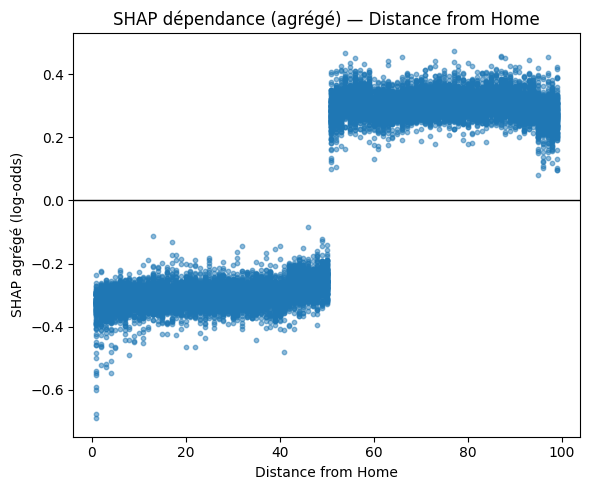

In [88]:
# SHAP agrégé numérique

def shap_dependence_aggregated_numeric(feature: str, top_k=None):
    idxs = group_idx.get(feature, [])
    if not idxs:
        print("Feature inconnue:", feature); return
    shap_agg = shap_mat_test[:, idxs].sum(axis=1)

    if feature not in X_test.columns:
        print("La variable n'est pas directement dans X_test (probablement catégorielle).")
        return

    xvals = X_test[feature]
    plt.figure(figsize=(6,5))
    plt.scatter(xvals, shap_agg, s=10, alpha=0.5)
    plt.axhline(0, color="black", lw=1)
    plt.title(f"SHAP dépendance (agrégé) — {feature}")
    plt.xlabel(feature); plt.ylabel("SHAP agrégé (log-odds)")
    plt.tight_layout(); plt.show()

# Exemple :
shap_dependence_aggregated_numeric("Distance from Home")


*Ce graphique montre comment la valeur d’une variable influence la prédiction du modèle, point par point, sur le jeu de test.*

*Company Reputation* :

- Pour les employés proches du lieu de travail (0–40 km) : la majorité des points sont en dessous de 0 (SHAP ≈ –0.3 à –0.4).

        Être proche réduit le risque d’attrition.
- Pour les employés loin du lieu de travail (50–100 km) : la plupart des points sont au-dessus de 0 (SHAP ≈ +0.3 à +0.4).

        Être loin augmente fortement le risque d’attrition.

        Interprétation : On observe donc une frontière nette autour de 40–50 km : en dessous, la proximité protège ; au-dessus, la distance devient un facteur de risque.

### 5. Recommandations

À partir de notre analyse SHAP globale, nous avons identifié que les variables qui influencent le plus l’attrition sont principalement : Marital Status, Job Level, Work-Life Balance, Remote Work, Distance from Home et Company Reputation.
Ces six facteurs se démarquent nettement comme étant les plus déterminants.

D’autres variables (par exemple Gender, Number of Dependents, Years at Company, Job Satisfaction, Number of Promotions, Overtime, Education Level, Performance Rating, Age) présentent également une certaine importance, mais avec un poids moindre dans le modèle. Enfin, certaines variables (Company Size, Monthly Income, Innovation Opportunities, Company Tenure, Employee Recognition) ont un impact beaucoup plus limité sur les prédictions, et contribuent moins à expliquer l’attrition.

**Par rapport aux six variables principales, les recommandations que nous pouvons formuler pour limiter le risque de départ sont les suivantes :**

- Marital Status
→ Les employés célibataires présentent un risque nettement plus élevé de départ.


        Recommandation : mettre en place des initiatives sociales (événements, clubs internes, activités de networking) et un soutien spécifique (bien-être, équilibre vie perso) pour renforcer leur attachement à l’entreprise.

- Job Level
→ Les employés débutants sont les plus à risque, alors que les seniors sont très fidèles.

        Recommandation : proposer des programmes de mentorat, des formations et des opportunités d’évolution rapide pour les jeunes recrues, tout en valorisant les seniors dans des rôles de transmission et d’accompagnement.

- Work-Life Balance
→ Un équilibre Poor ou Fair augmente fortement l’attrition, tandis qu’un équilibre Excellent protège les employés.


        Recommandation : mettre en place des politiques de flexibilité, réduire la surcharge de travail et encourager une culture managériale axée sur le bien-être et la conciliation vie pro/perso.

- Remote Work
→ Les employés sans télétravail ont un risque de départ plus élevé, alors que le télétravail réduit significativement l’attrition.
        
        Recommandation : développer ou maintenir les politiques de télétravail.

- Distance from Home
→ Les employés qui habitent loin du lieu de travail (> 50 km) présentent un risque accru de départ.


        Recommandation : offrir davantage de télétravail aux salariés éloignés, faciliter la mobilité interne et mettre en place des aides (transport, relocalisation).

- Company Reputation
→ Une mauvaise réputation accroît le risque d’attrition, alors qu’une réputation bonne ou excellente favorise la fidélisation.

        Recommandation : investir dans la marque employeur et améliorer la communication interne/externe.

*En résumé, agir en priorité sur ces six leviers principaux — statut marital, niveau de carrière, équilibre vie pro/perso, télétravail, distance domicile-travail et réputation de l’entreprise — permettrait de réduire significativement le risque de départ et d’améliorer la rétention des talents, tandis que les autres variables, bien que moins influentes, peuvent également être prises en compte pour affiner les politiques RH.*